# Image Classification
Naomi Zilber

The data set used is from [this link](https://www.kaggle.com/datasets/puneet6060/intel-image-classification). The target classes are the types of images, which are buildings, forest, glacier, mountain, sea, and street, each corresponding to a number 0-5, respectively. Therefore, the model should be able to predict the image type based on the image itself.

### Load Data

In [2]:
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split

The training data has 60K observations, but training
will select batches of 128 examples at a time. The target, the image type, has 6 classes. The number of epochs is limited to 20, so training will stop after 20 forward and backward passes.

In [3]:
batch_size = 128
num_classes = 6
epochs = 20

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip /content/drive/MyDrive/ColabNotebooks/images.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [6]:
# load the data
data = {}
X = []
train_path = "/content/seg_train/seg_train"
for folder in os.listdir(train_path):
    img_folder =  train_path + "/" + folder
    images = os.listdir(img_folder)
    data[folder] = len(images)
    for img in images:
        img_path = img_folder + "/" + img
        temp = Image.open(img_path)
        temp = temp.convert("RGB")
        temp = np.array(temp)
        temp = cv2.resize(temp, (224, 224))
        X.append(temp)

In [7]:
# look at the amount of data
for key in data.keys(): 
    print("There are %s images of %s" % (data[key], key))

total = data['glacier'] + data['buildings'] + data['forest'] + data['street'] + data['mountain']
print("Total number of pictures:", total)

There are 2512 images of mountain
There are 2274 images of sea
There are 2271 images of forest
There are 2404 images of glacier
There are 2191 images of buildings
There are 2382 images of street
Total number of pictures: 11760


In [8]:
X = np.array(X)
y = np.ones((14034,), dtype = "int32")

In [9]:
# assign each image type a number
# use the numbers found above to calculate each range
y[:2404] = 2
y[2404:4595] = 0
y[4595:7107] = 3
y[7107:9489] = 5
y[9489:11760] = 1
y[11760:] = 4

In [10]:
# shuffle the training data since it is too organized
X, y = shuffle(X, y, random_state=1234)

y = tf.keras.utils.to_categorical(y, num_classes)

In [11]:
# split into test and train data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# print the dimensions of the train and test data
print('train size =', x_train.shape)
print('test size =', x_test.shape)

train size = (11227, 224, 224, 3)
test size = (2807, 224, 224, 3)


### Data Exploration

From the bar plot of the distribution of the target classes, it seems like the distribution is fairly even with all target classes having similar amount of images.

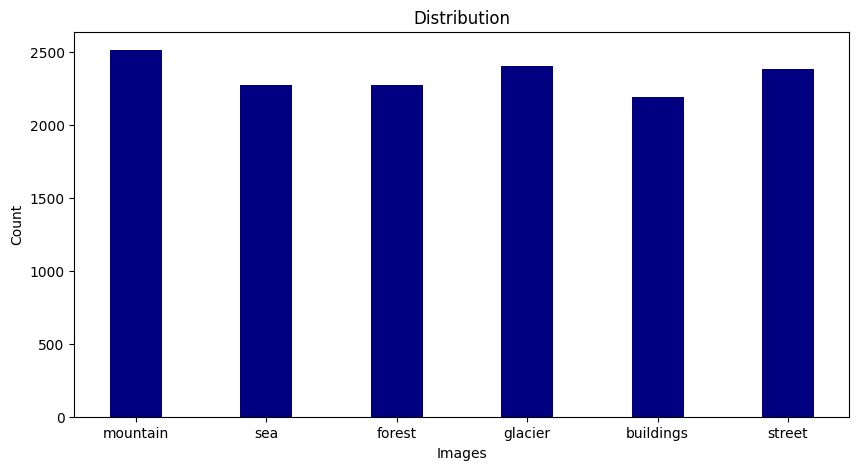

In [11]:
# graph of the distribution of the target classes

target = list(data.keys())
amount = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(target, amount, color ='navy', width = 0.4)

plt.title('Distribution')
plt.ylabel('Count')
plt.xlabel('Images')
plt.show()

### Sequential Model

Make a sequential model

In [12]:
# create a sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 512)               77070848  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 77,203,718
Trainable params: 77,203,718
No

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
88/88 [==============================] - 177s 2s/step - loss: 9712.4180 - accuracy: 0.1875 - val_loss: 2.0222 - val_accuracy: 0.1792
Epoch 2/20
88/88 [==============================] - 171s 2s/step - loss: 52.6411 - accuracy: 0.1805 - val_loss: 1.9182 - val_accuracy: 0.1788
Epoch 3/20
88/88 [==============================] - 179s 2s/step - loss: 9.9246 - accuracy: 0.1792 - val_loss: 1.9353 - val_accuracy: 0.1792
Epoch 4/20
88/88 [==============================] - 183s 2s/step - loss: 71.8147 - accuracy: 0.1787 - val_loss: 1.9289 - val_accuracy: 0.1792
Epoch 5/20
88/88 [==============================] - 179s 2s/step - loss: 1.7907 - accuracy: 0.1791 - val_loss: 1.9279 - val_accuracy: 0.1792
Epoch 6/20
88/88 [==============================] - 178s 2s/step - loss: 1.7906 - accuracy: 0.1791 - val_loss: 1.9303 - val_accuracy: 0.1792
Epoch 7/20
88/88 [==============================] - 178s 2s/step - loss: 1.7908 - accuracy: 0.1790 - val_loss: 1.9266 - val_accuracy: 0.1792
Epoch 8/

The accuracy is 0.1790 and the validation accuracy is 0.1792.

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

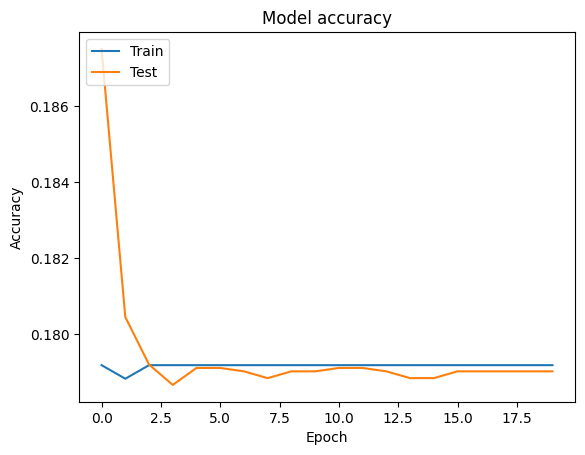

In [17]:
# plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
# evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.9076663255691528
Test accuracy: 0.1791948676109314


The accuracy of the sequential model is 0.1792, which is not very good.

### CNN Model

Make a convolutional neural network

In [9]:
# make the model
model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dropout (Dropout)           (None, 186624)            0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train[:5000], y_train[:5000],
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test[:5000], y_test[:5000]))

Epoch 1/10
40/40 [==============================] - 496s 12s/step - loss: 238.8341 - accuracy: 0.2480 - val_loss: 1.9834 - val_accuracy: 0.2009
Epoch 2/10
40/40 [==============================] - 511s 13s/step - loss: 1.6456 - accuracy: 0.3144 - val_loss: 1.6680 - val_accuracy: 0.3114
Epoch 3/10
40/40 [==============================] - 525s 13s/step - loss: 1.4440 - accuracy: 0.4330 - val_loss: 1.7132 - val_accuracy: 0.3131
Epoch 4/10
40/40 [==============================] - 495s 12s/step - loss: 1.2263 - accuracy: 0.5340 - val_loss: 1.8991 - val_accuracy: 0.4214
Epoch 5/10
40/40 [==============================] - 481s 12s/step - loss: 0.9599 - accuracy: 0.6478 - val_loss: 1.9909 - val_accuracy: 0.4264
Epoch 6/10
40/40 [==============================] - 440s 11s/step - loss: 0.7727 - accuracy: 0.7204 - val_loss: 2.2133 - val_accuracy: 0.4165
Epoch 7/10
40/40 [==============================] - 463s 12s/step - loss: 0.6691 - accuracy: 0.7610 - val_loss: 2.2590 - val_accuracy: 0.4175
Epoc

For the above code, I had to use only half of the datasets because the system wasn't able to handle more data. I also adjusted the number of epochs because it was taking a very long time for the model to train.

The accuracy ended up being 0.82 and the validation accuracy is 0.4353, which is much better than the sequential model and a big improvement.

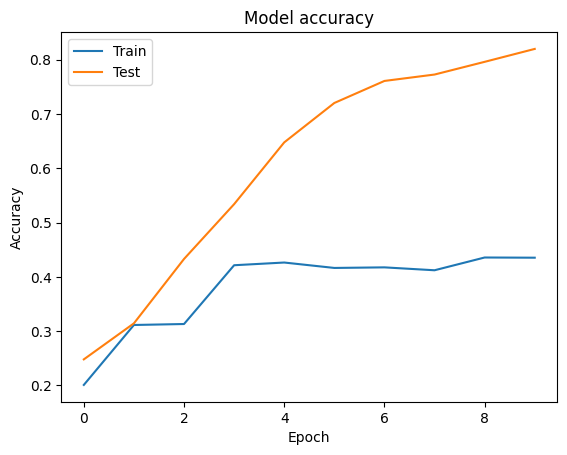

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
# evaluation
score = model.evaluate(x_test[:5000], y_test[:5000], verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.0672171115875244
Test accuracy: 0.4353402256965637


The accuracy is 0.4353, which is an improvement on the previous model.

### Pretrained Transfer Learning Model

#### Creating the base model

In [12]:
# Use only a small subset of the original data because the system keeps crashing
train_x = x_train[:50]
train_y = y_train[:50]

test_x = x_test[:50]
test_y = y_test[:50]

In [13]:
# check that the distribution of the new dataset is relatively even
def evenDist(dataset):
  lb1 = 0
  lb2 = 0
  lb3 = 0
  lb4 = 0
  lb5 = 0
  lb6 = 0
  for i in range(50):
    if np.array_equal(dataset[i], [0,0,0,0,0,1], equal_nan=False):
      lb1 += 1
    elif np.array_equal(dataset[i], [0,0,0,0,1,0], equal_nan=False):
      lb2 += 1
    elif np.array_equal(dataset[i], [0,0,0,1,0,0], equal_nan=False):
      lb3 += 1
    elif np.array_equal(dataset[i], [0,0,1,0,0,0], equal_nan=False):
      lb4 += 1
    elif np.array_equal(dataset[i], [0,1,0,0,0,0], equal_nan=False):
      lb5 += 1
    else:
      lb6 += 1
  return (lb1, lb2, lb3, lb4, lb5, lb6)

In [14]:
# the distribution looks relatively even among the target classes

lbs1 = evenDist(train_y)
print('lb1 =', lbs1[0])
print('lb2 =', lbs1[1])
print('lb3 =', lbs1[2])
print('lb4 =', lbs1[3])
print('lb5 =', lbs1[4])
print('lb6 =', lbs1[5])

lbs2 = evenDist(test_y)
print('\nlb1 =', lbs2[0])
print('lb2 =', lbs2[1])
print('lb3 =', lbs2[2])
print('lb4 =', lbs2[3])
print('lb5 =', lbs2[4])
print('lb6 =', lbs2[5])

lb1 = 12
lb2 = 10
lb3 = 5
lb4 = 11
lb5 = 7
lb6 = 5

lb1 = 8
lb2 = 8
lb3 = 7
lb4 = 10
lb5 = 13
lb6 = 4


In [58]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# rescale pixel values
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [59]:
IMG_SIZE = (224, 224)

# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Convert each 224x224x3 image into a 7x7x1280 block of features

In [60]:
image_batch = train_x
label_batch = train_y
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(50, 7, 7, 1280)


#### Feature extraction

In [61]:
# freeze the convolutional base model
base_model.trainable = False

In [62]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [63]:
# convert the features to a single 1280-element vector per image
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(50, 1280)


In [64]:
# convert these features into a single prediction per image
prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(50, 6)


#### Build a model

In [65]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

#### Compile the model

In [66]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

#### Train the model.
It looks like the initial accuracy of the model is very low

In [68]:
initial_epochs = 10

# evaluation
score = model.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 5s 1s/step - loss: 2.1301 - accuracy: 0.1000
Test loss: 2.1301393508911133
Test accuracy: 0.10000000149011612


In [69]:
history = model.fit(train_x, train_y,
                    epochs=initial_epochs,
                    validation_data=(test_x, test_y))

Epoch 1/10
2/2 [==============================] - 7s 2s/step - loss: 2.4661 - accuracy: 0.0600 - val_loss: 2.0941 - val_accuracy: 0.1000
Epoch 2/10
2/2 [==============================] - 4s 3s/step - loss: 2.2372 - accuracy: 0.2000 - val_loss: 2.0592 - val_accuracy: 0.1200
Epoch 3/10
2/2 [==============================] - 6s 4s/step - loss: 2.1622 - accuracy: 0.1400 - val_loss: 2.0269 - val_accuracy: 0.1200
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 2.1780 - accuracy: 0.1400 - val_loss: 1.9955 - val_accuracy: 0.1400
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 2.0626 - accuracy: 0.2200 - val_loss: 1.9659 - val_accuracy: 0.1600
Epoch 6/10
2/2 [==============================] - 8s 6s/step - loss: 2.0808 - accuracy: 0.2400 - val_loss: 1.9385 - val_accuracy: 0.1800
Epoch 7/10
2/2 [==============================] - 5s 4s/step - loss: 2.0744 - accuracy: 0.1800 - val_loss: 1.9123 - val_accuracy: 0.2000
Epoch 8/10
2/2 [=========================

The accuracy has improved compared to the initial model accuracy.

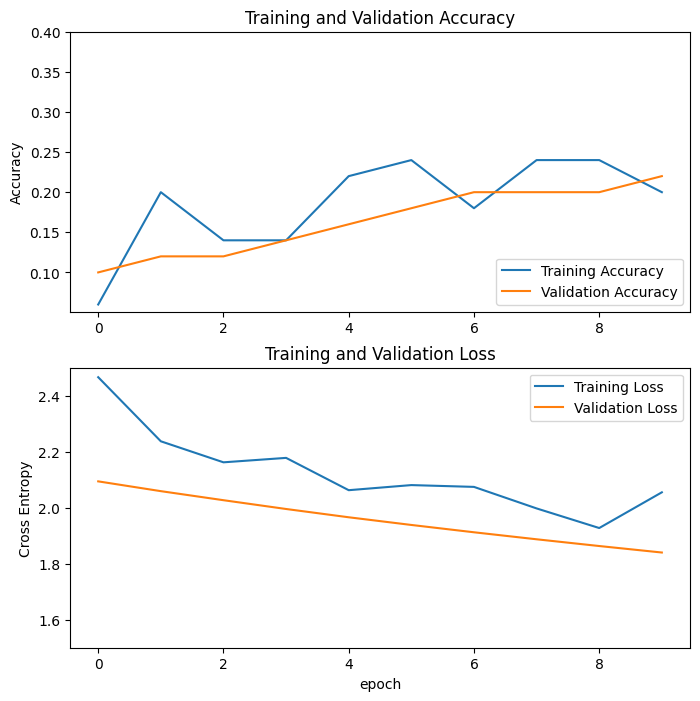

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 0.4])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([1.5, 2.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine tuning

In [71]:
# unfreeze the model
base_model.trainable = True

In [72]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


Compile the model

In [73]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_4 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_4 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

In [74]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_x, train_y,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=(test_x, test_y))

Epoch 10/20
2/2 [==============================] - 13s 4s/step - loss: 1.9546 - accuracy: 0.2000 - val_loss: 1.6190 - val_accuracy: 0.3800
Epoch 11/20
2/2 [==============================] - 6s 4s/step - loss: 1.4775 - accuracy: 0.4200 - val_loss: 1.5232 - val_accuracy: 0.4800
Epoch 12/20
2/2 [==============================] - 7s 4s/step - loss: 1.1771 - accuracy: 0.6400 - val_loss: 1.4610 - val_accuracy: 0.4600
Epoch 13/20
2/2 [==============================] - 5s 4s/step - loss: 1.0145 - accuracy: 0.6800 - val_loss: 1.4064 - val_accuracy: 0.5000
Epoch 14/20
2/2 [==============================] - 7s 4s/step - loss: 0.8714 - accuracy: 0.7200 - val_loss: 1.3630 - val_accuracy: 0.5200
Epoch 15/20
2/2 [==============================] - 4s 3s/step - loss: 0.7549 - accuracy: 0.8400 - val_loss: 1.3084 - val_accuracy: 0.5000
Epoch 16/20
2/2 [==============================] - 5s 4s/step - loss: 0.6390 - accuracy: 0.8400 - val_loss: 1.2903 - val_accuracy: 0.5400
Epoch 17/20
2/2 [================

After fine-tuning, the accuracy has improved

In [75]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

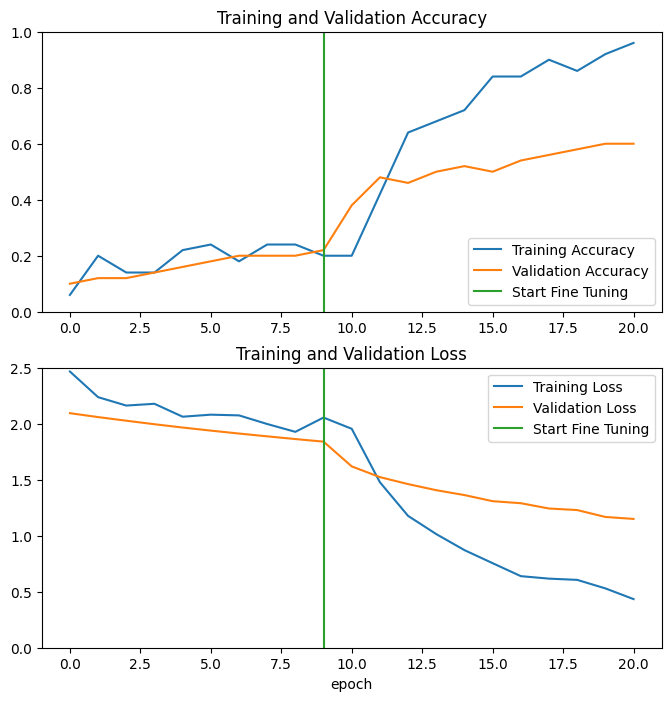

In [77]:
plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.5])
plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Evaluation

In [78]:
# evaluation
score = model.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 2s 548ms/step - loss: 1.1500 - accuracy: 0.6000
Test loss: 1.1500091552734375
Test accuracy: 0.6000000238418579


The accuracy is much better after fine tuning, with the accuracy being 0.60.

### Analysis

It looks like the sequential model did the worst out of all the other models, with accuracy of 0.1792. The CNN model did the second best, with an accuracy of 0.4353. The model that performed the best is the pretrained transfer learning model, which got an accuracy of 0.60 after fine tuning.

It took all models a lot of time to run, with the CNN model running the longest. The pretrained transfer learning model probably performed the best out of all the models because it learns from previous tasks, while sequential and CNN models are not trained on anything prior to the creating of the model.